# Data Visualization on Airbnb New User Booking Dataset

In [41]:
import pandas as pd

In [42]:
!wget -O countries.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/countries.csv

--2019-06-28 07:38:20--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632 [text/plain]
Saving to: ‘countries.csv’

100%[======================================>] 632         --.-K/s   in 0s      

2019-06-28 07:38:20 (132 MB/s) - ‘countries.csv’ saved [632/632]



In [43]:
!wget -O test.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/train_users_2.csv

--2019-06-28 07:38:20--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/train_users_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24853881 (24M) [text/plain]
Saving to: ‘test.csv’

100%[======================================>] 24,853,881  76.7MB/s   in 0.3s   

2019-06-28 07:38:21 (76.7 MB/s) - ‘test.csv’ saved [24853881/24853881]



In [44]:
!ls

countries.csv  test.csv


In [45]:
df=pd.read_csv("countries.csv")

In [46]:
df2=pd.read_csv("test.csv")

In [47]:
df.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [48]:
df2.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [49]:
df.shape

(10, 7)

In [50]:
df2.shape

(213451, 16)

In [51]:
df2.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [52]:
age=df2['age'].mean()

In [53]:
print(age)

49.66833517985669


In [54]:
df2['age'].fillna(age,inplace=True)

In [55]:
df2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [56]:
df2.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [57]:
result=pd.merge(df,df2,how='outer',on=['country_destination','country_destination'])

In [58]:
result.head(50)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,id,date_account_created,timestamp_first_active,...,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,9kyyikfd0n,2010-07-13,20100713005813,...,37.000000,facebook,2,en,direct,direct,untracked,Web,Windows Desktop,IE
1,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,j37yqxs2mv,2010-07-17,20100717200206,...,44.000000,basic,2,en,direct,direct,untracked,Web,Windows Desktop,Chrome
2,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,ufql1b9dd6,2010-10-02,20101002235537,...,33.000000,basic,2,en,direct,direct,NaN,Web,Other/Unknown,-unknown-
3,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,7i1wc34vxj,2010-11-09,20101109013423,...,33.000000,facebook,3,en,direct,direct,linked,Web,Mac Desktop,Chrome
4,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,au8il8tsax,2010-11-10,20101110094308,...,30.000000,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Firefox
5,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,wllddx4t9x,2010-11-28,20101128222816,...,49.668335,basic,2,en,direct,direct,untracked,Web,Desktop (Other),Chrome
6,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,nyuvzuxm15,2010-12-23,20101223071120,...,49.668335,basic,2,en,seo,google,NaN,Web,Other/Unknown,-unknown-
7,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,0utla8qada,2011-02-19,20110219055855,...,54.000000,basic,2,en,content,google,untracked,Web,Windows Desktop,IE
8,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,svhhd2b7en,2011-02-19,20110219072302,...,72.000000,basic,3,en,other,craigslist,untracked,Web,Android Phone,Android Browser
9,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,ntbkupk41c,2011-04-04,20110404083245,...,30.000000,basic,2,en,sem-non-brand,google,untracked,Web,Windows Desktop,Firefox


In [59]:
country_dest=result.country_destination.value_counts()

In [60]:
country_dest.head()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
Name: country_destination, dtype: int64

In [61]:
import matplotlib.pyplot as plt

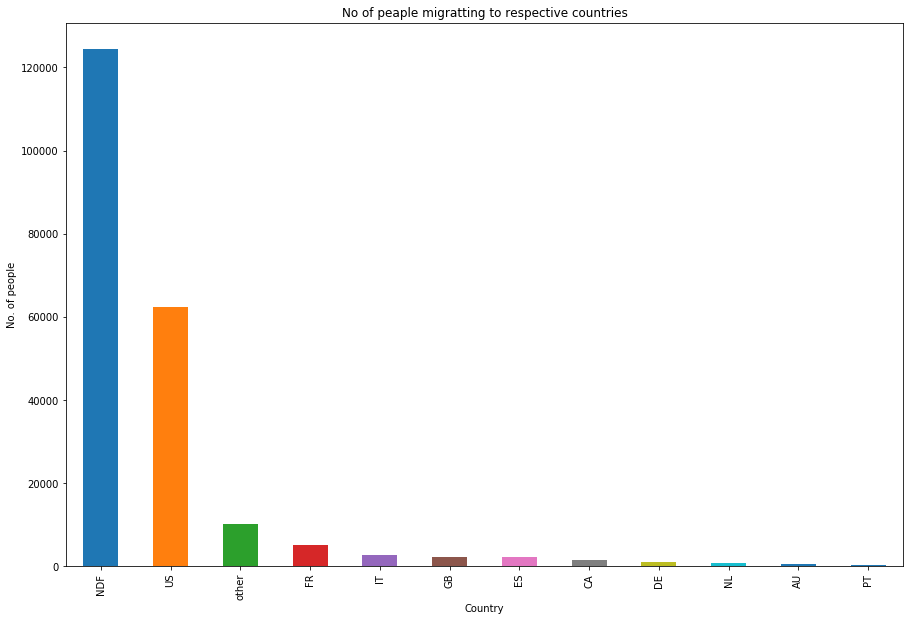

In [62]:
country_dest.plot(kind='bar',figsize=(15,10))
plt.title("No of peaple migratting to respective countries")
plt.xlabel("Country")
plt.ylabel("No. of people")
plt.show()

In [63]:
#country_dest.plot(kind='bar',figsize=(8,8))
#plt.title("No of peaple migratting to respective countries")
#plt.xlabel("Country")
#plt.ylabel("No. of people")
#count = 0
#for val in country_dest:
#    plt.annotate(val,xy=(val+60,count),color='black')
#    count=count+1
#plt.show()

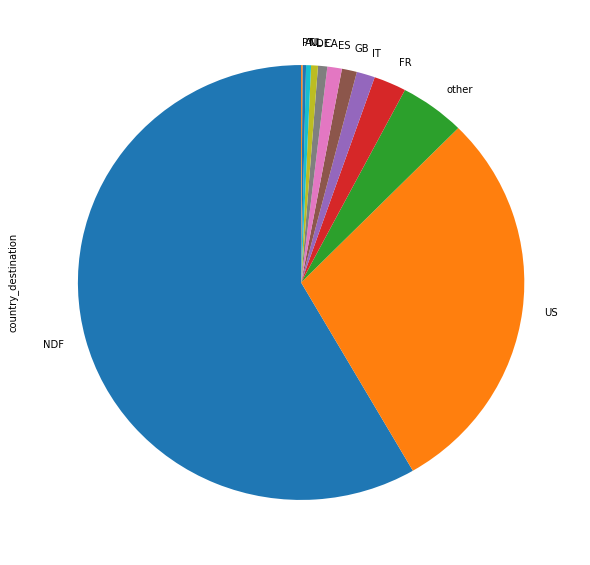

In [64]:
country_dest.plot(kind='pie',figsize=(10,10),startangle=90)

In [65]:
devise_usage=result.first_device_type.value_counts()

In [66]:
devise_usage

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

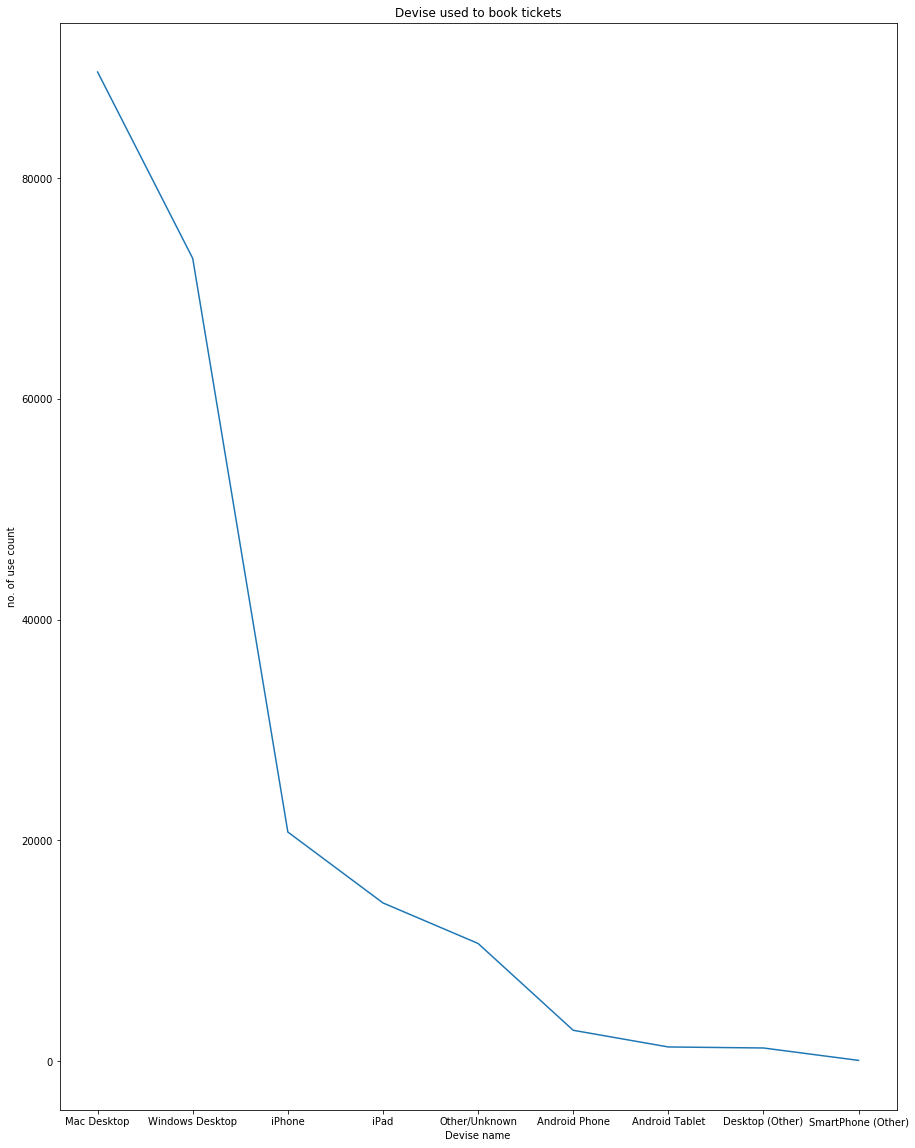

In [67]:
devise_usage.plot(kind='line' ,figsize=(15,20))
plt.title("Devise used to book tickets")
plt.xlabel("Devise name")
plt.ylabel("no. of use count")
plt.show()

In [68]:
book_Method=result.signup_method.value_counts()

In [69]:
book_Method

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

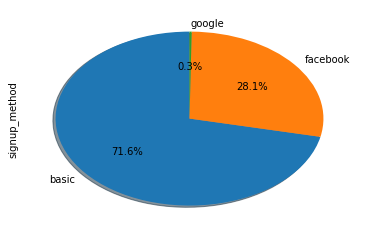

In [70]:
book_Method.plot(kind='pie',startangle=90,shadow=True,autopct="%1.1f%%")

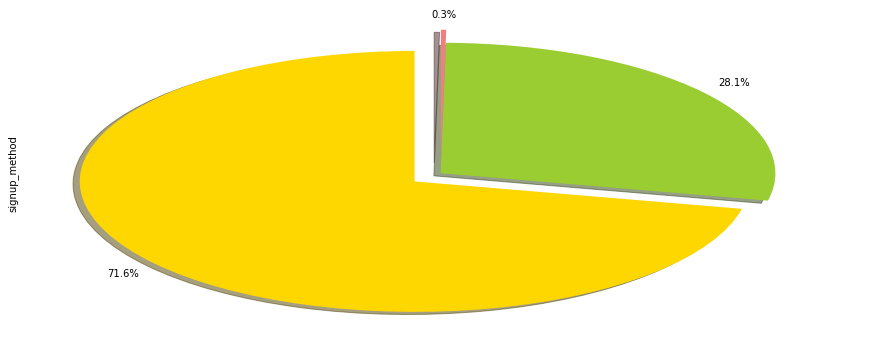

In [71]:
colors_list = ['gold', 'yellowgreen', 'lightcoral']
explode_list = [0.1, 0, 0.1] # ratio for each continent with which to offset each wedge.

book_Method.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.show()

In [72]:
!pip install folium

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [73]:
import folium


In [74]:
lat=-26.853388
long=133.27516
base = folium.Map(location=[lat,long], zoom_start=12)
base

In [76]:
incidents = folium.map.FeatureGroup()

inc_long = df['lat_destination']
inc_lat = df['lng_destination']
for i in range(10):
    incidents.add_child(
        folium.CircleMarker(
            [inc_lat[i],inc_long[i]],
            radius = 10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
                  
)
)

base.add_child(incidents)